In [1]:
# Import of all necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Data ingestion of the two excel files
data1 = pd.read_excel('/Users/benediktgeitz/Desktop/EMA CSCK503/Dataset/2 - Grid Emissions Summary - Excel Files/Excel/LAEI2013_Emissions_Summary-CO2_v1.1.xlsx', sheet_name='CO2 by Grid Exact Cut')
data2 = pd.read_excel('/Users/benediktgeitz/Desktop/EMA CSCK503/Dataset/1. Supporting Information/1. Road Traffic Data/Excel/LAEI2013_2013_AADT-VKM.xlsx', sheet_name='MajorGrid_AADTandVKM_2013')

In [3]:
# Since there are some columns that have spaces, that hinder calling them, strip is applied to get rid of the unwanted spaces
data1.columns = data1.columns.str.strip()
data2.columns = data2.columns.str.strip()

In [4]:
# For better understanding after the datasets are merged some columns are renamed
data1.rename(columns={'Total': 'CO2_TOTAL'}, inplace=True)
data2.rename(columns={'BoroughName_ExactCut': 'Borough'}, inplace=True)
data2.rename(columns={'Speed (kph)': 'Speed'}, inplace=True)

In [5]:
# Selection of all relevant columns of each dataset
df1 = data1[['GRID_ExactCut_ID', 'Borough', 'Household and Garden', 'Small Waste and Accidental Fires', 'Agriculture', 'STW', 'WTS', 'Landfill', 
    'NRMM Construction', 'NRMM Industry', 'C&D Dust', 'Domestic Gas', 'Commercial Gas', 'Domestic Other Fuels', 
    'Commercial Other Fuels', 'Industry Part A', 'Industry Part B', 'Aviation', 'Passenger Shipping', 
    'Commercial Shipping', 'Rail Freight', 'Rail Passengers', 'Resuspension', 'Motorcycle', 'Taxi', 'Petrol Car', 
    'Diesel Car', 'Electric Car', 'Petrol LGV', 'Diesel LGV', 'Electric LGV', 'TfL Bus', 'Non-TfL Bus and Coach', 
    'Artic HGV', 'Rigid HGV', 'CO2_TOTAL']]
df2 = data2[['GRID_ExactCut_ID', 'Speed','VKM_Motorcycle', 'VKM_Taxi', 'VKM_Pcar', 'VKM_Dcar', 'VKM_PLgv', 'VKM_DLgv', 'VKM_LtBus',
               'VKM_Coach', 'VKM_Rigid2Axle', 'VKM_Rigid3Axle', 'VKM_Rigid4Axle', 'VKM_Artic3Axle',
               'VKM_Artic5Axle', 'VKM_Artic6Axle', 'VKM_ElectricCar', 'VKM_ElectricLgv', 'VKM_TOTAL']]

In [6]:
# Merge of the two dataframes with the selected columns
df_large = df1.merge(df2, on='GRID_ExactCut_ID')

In [7]:
# List of columns that shall be summed to compare them to the other features
columns_to_sum_1 = ['VKM_Motorcycle', 'VKM_Taxi', 'VKM_PLgv', 'VKM_DLgv', 'VKM_LtBus',
               'VKM_Coach', 'VKM_Rigid2Axle', 'VKM_Rigid3Axle', 'VKM_Rigid4Axle', 'VKM_Artic3Axle',
               'VKM_Artic5Axle', 'VKM_Artic6Axle', 'VKM_ElectricCar', 'VKM_ElectricLgv']

columns_to_sum_2 = ['Household and Garden', 'Small Waste and Accidental Fires', 'Agriculture', 'STW', 'WTS', 'Landfill', 
    'NRMM Construction', 'NRMM Industry', 'C&D Dust', 'Domestic Gas', 'Commercial Gas', 'Domestic Other Fuels', 
    'Commercial Other Fuels', 'Industry Part A', 'Industry Part B', 'Aviation', 'Passenger Shipping', 
    'Commercial Shipping', 'Rail Freight', 'Rail Passengers', 'Resuspension', 'Motorcycle', 'Taxi', 'Electric Car', 'Petrol LGV', 'Diesel LGV', 'Electric LGV', 'TfL Bus', 'Non-TfL Bus and Coach', 
    'Artic HGV', 'Rigid HGV']

# To avoid errors because of wrong data types, possible strings are converted into numeric types
df_large[columns_to_sum_1] = df_large[columns_to_sum_1].apply(pd.to_numeric, errors='coerce')
df_large[columns_to_sum_2] = df_large[columns_to_sum_2].apply(pd.to_numeric, errors='coerce')

# The listed columns are summed row-wise and a new column 'VKM_TOTAL' is created
df_large['VKM_REST'] = df_large[columns_to_sum_1].sum(axis=1)
df_large['CO2_REST'] = df_large[columns_to_sum_2].sum(axis=1)

In [8]:
# The columns summed can be dropped at this point
df = df_large.drop(columns=['VKM_Motorcycle', 'VKM_Taxi', 'VKM_PLgv', 'VKM_DLgv', 'VKM_LtBus',
               'VKM_Coach', 'VKM_Rigid2Axle', 'VKM_Rigid3Axle', 'VKM_Rigid4Axle', 'VKM_Artic3Axle',
               'VKM_Artic5Axle', 'VKM_Artic6Axle', 'VKM_ElectricCar', 'VKM_ElectricLgv', 'Household and Garden', 'Small Waste and Accidental Fires', 'Agriculture', 'STW', 'WTS', 'Landfill', 
    'NRMM Construction', 'NRMM Industry', 'C&D Dust', 'Domestic Gas', 'Commercial Gas', 'Domestic Other Fuels', 
    'Commercial Other Fuels', 'Industry Part A', 'Industry Part B', 'Aviation', 'Passenger Shipping', 
    'Commercial Shipping', 'Rail Freight', 'Rail Passengers', 'Resuspension', 'Motorcycle', 'Taxi', 'Electric Car', 'Petrol LGV', 'Diesel LGV', 'Electric LGV', 'TfL Bus', 'Non-TfL Bus and Coach', 
    'Artic HGV', 'Rigid HGV'])

In [9]:
df

,GRID_ExactCut_ID,Borough,Petrol Car,Diesel Car,CO2_TOTAL,Speed,VKM_Pcar,VKM_Dcar,VKM_TOTAL,VKM_REST,CO2_REST
0,2,NonGLA,4813.802423,2779.411657,13999.035705,86.078213,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6405.821626
1,2,NonGLA,4813.802423,2779.411657,13999.035705,82.731854,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6405.821626
2,2,NonGLA,4813.802423,2779.411657,13999.035705,98.599667,5.276161e+05,6.183877e+05,1.478443e+06,3.324396e+05,6405.821626
3,2,NonGLA,4813.802423,2779.411657,13999.035705,104.554479,1.597823e+06,1.872715e+06,4.477292e+06,1.006754e+06,6405.821626
4,2,NonGLA,4813.802423,2779.411657,13999.035705,104.025027,1.512226e+06,1.772391e+06,4.237439e+06,9.528213e+05,6405.821626
...,...,...,...,...,...,...,...,...,...,...,...
527971,3355,City,1832.675449,1115.049455,33934.341063,11.060275,7.126998e+03,4.228829e+03,2.534650e+04,1.399068e+04,30986.616159
527972,3355,City,1832.675449,1115.049455,33934.341063,12.726432,1.194441e+04,7.087254e+03,4.032233e+04,2.129067e+04,30986.616159
527973,3355,City,1832.675449,1115.049455,33934.341063,16.517388,2.446671e+03,1.451740e+03,1.297375e+04,9.075334e+03,30986.616159
527974,3355,City,1832.675449,1115.049455,33934.341063,14.792541,1.274163e+03,7.560291e+02,9.441438e+03,7.411245e+03,30986.616159


In [ ]:
# For code testing and possible other, larger datasets this could reduce the size of the dataset
'''df = df_large.sample(frac=0.01, random_state=42)  # Sample 1% of the data'''

In [10]:
# Here the final dataset is checked for data quality 
print(df.info())  # Checks for missing values and data types
print(df.describe())  # Summarizes statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527976 entries, 0 to 527975
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   GRID_ExactCut_ID  527976 non-null  int64  
 1   Borough           527976 non-null  object 
 2   Petrol Car        527976 non-null  float64
 3   Diesel Car        527976 non-null  float64
 4   CO2_TOTAL         527976 non-null  float64
 5   Speed             527976 non-null  float64
 6   VKM_Pcar          527976 non-null  float64
 7   VKM_Dcar          527976 non-null  float64
 8   VKM_TOTAL         527976 non-null  float64
 9   VKM_REST          527976 non-null  float64
 10  CO2_REST          527976 non-null  float64
dtypes: float64(9), int64(1), object(1)
memory usage: 44.3+ MB
None
       GRID_ExactCut_ID     Petrol Car     Diesel Car     CO2_TOTAL  \
count     527976.000000  527976.000000  527976.000000  5.279760e+05   
mean        1820.571912    1816.068895    1073.891188  

Cross-Validation R-squared Scores: [0.87868114 0.91712713 0.86532175 0.90349038 0.84957068]
Mean Cross-Validation R-squared Score: 0.8828382143651844
Mean Squared Error: 76479124.13930164
R-squared Score: 0.9197413864896625
      Feature  Importance
0  Petrol Car    0.406543
1  Diesel Car    0.396087
2       Speed    0.095411
3    VKM_Pcar    0.022337
4    VKM_Dcar    0.029286
5   VKM_TOTAL    0.050336


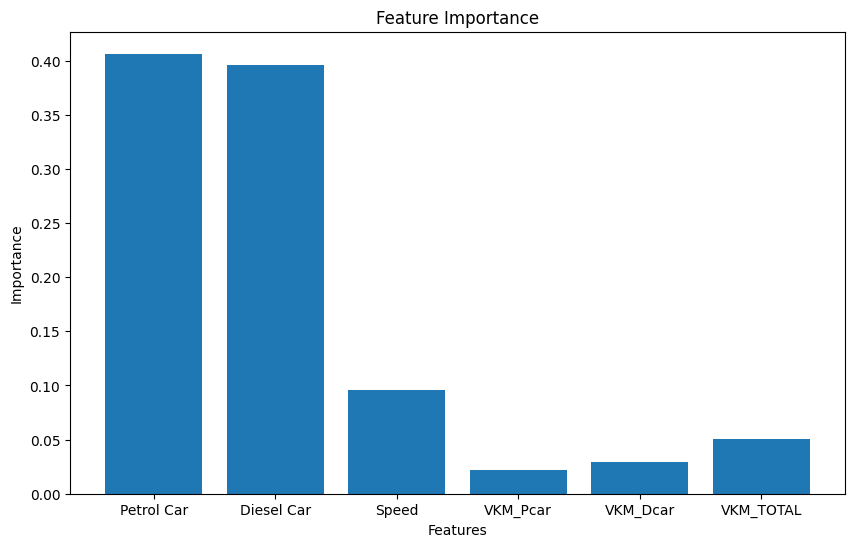

In [11]:
# Features and targets are defined 
features = ['Petrol Car', 'Diesel Car', 'Speed', 'VKM_Pcar', 'VKM_Dcar', 'VKM_TOTAL']
target_co2 = 'CO2_TOTAL' 

# X- and Y-values are defined with the inout from the final dataframe 
X = df[features]
y_co2 = df[target_co2]

# X and Y are split into training and test sets. In this case a 80-20 split. Random State of 42 is a common number and a little joke with respect to a famous movie. 
X_train, X_test, y_train, y_test = train_test_split(X, y_co2, test_size=0.2, random_state=42)

# Training the model with cross-validation
model = RandomForestRegressor(n_estimators=100, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(f'Cross-Validation R-squared Scores: {cv_scores}')
print(f'Mean Cross-Validation R-squared Score: {cv_scores.mean()}')

model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2_co2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2_co2}')

# Feature Importance
importance = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
print(feature_importance_df)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [12]:
# Reducing driven kilometers by 20%
X_test_reduced_km = X_test.copy()
X_test_reduced_km['VKM_Pcar'] *= 0.8
X_test_reduced_km['VKM_Dcar'] *= 0.8
X_test_reduced_km['VKM_TOTAL'] = X_test_reduced_km['VKM_Pcar'] + X_test_reduced_km['VKM_Dcar']

# Predicting the impact
y_pred_reduced_km = model.predict(X_test_reduced_km)
impact_reduced_km = y_pred - y_pred_reduced_km

print(f'Impact of reducing driven kilometers by 20%: {impact_reduced_km}')

Impact of reducing driven kilometers by 20%: [1035.69011627  898.65919258 4929.5434257  ...   19.09866437   49.18747537
  928.41792701]


In [13]:
# Reducing speed to 30 km/h only if above 30 km/h
X_test_reduced_speed = X_test.copy()
X_test_reduced_speed.loc[X_test_reduced_speed['Speed'] > 30, 'Speed'] = 30

# Predicting the impact
y_pred_reduced_speed = model.predict(X_test_reduced_speed)
impact_reduced_speed = y_pred - y_pred_reduced_speed

print(f'Impact of reducing speed to 30 km/h: {impact_reduced_speed}')

Impact of reducing speed to 30 km/h: [   0.         1100.04456328    0.         ...    0.         -361.59285866
    0.        ]


In [14]:
# Combine the results into a DataFrame
results_df = pd.DataFrame({
    'GRID_ExactCut_ID': df['GRID_ExactCut_ID'][X_test.index].values,
    'Borough': df['Borough'][X_test.index].values,
    'Actual CO2': y_test.values,
    'Predicted CO2': y_pred,
    'Reduced KM CO2': y_pred_reduced_km,
    'Reduced Speed CO2': y_pred_reduced_speed
})

In [15]:
results_df

,GRID_ExactCut_ID,Borough,Actual CO2,Predicted CO2,Reduced KM CO2,Reduced Speed CO2
0,2309,Wandsworth,22565.531463,22049.984011,21014.293895,22049.984011
1,595,NonGLA,1336.474713,2735.793851,1837.134659,1635.749288
2,2970,Hillingdon,67410.218442,41740.425483,36810.882057,41740.425483
3,1182,NonGLA,1386.173998,2238.309902,1895.656181,7275.242482
4,901,Greenwich,24990.872853,24457.396101,23206.150014,24457.396101
...,...,...,...,...,...,...
105591,1037,Merton,11407.889537,11212.157286,11256.658951,11212.157286
105592,976,Lewisham,11296.540361,11381.650577,10887.678626,11425.564141
105593,2559,Croydon,1592.197864,1746.747109,1727.648444,1746.747109
105594,2627,Enfield,10439.820483,8872.275871,8823.088396,9233.868730


In [16]:
# Combine the results into a DataFrame
results_df = pd.DataFrame({
    'GRID_ExactCut_ID': df['GRID_ExactCut_ID'][X_test.index].values,
    'Borough': df['Borough'][X_test.index].values,
    'Actual CO2': y_test.values,
    'Predicted CO2': y_pred,
    'Reduced KM CO2': y_pred_reduced_km,
    'Reduced Speed CO2': y_pred_reduced_speed
})

# Aggregate results by borough
results_by_borough = results_df.groupby('Borough').sum().reset_index()
print(results_by_borough)

                   Borough  GRID_ExactCut_ID    Actual CO2  Predicted CO2  \
0     Barking and Dagenham           3365535  3.908824e+07   3.300414e+07   
1                   Barnet           8592966  6.782400e+07   6.947916e+07   
2                   Bexley           5510980  3.020915e+07   3.127749e+07   
3                    Brent           5672269  4.135930e+07   4.236249e+07   
4                  Bromley           7579964  2.629750e+07   2.875823e+07   
5                   Camden           6227709  6.357833e+07   6.170225e+07   
6                     City           3245208  3.289729e+07   3.190922e+07   
7      City of Westminster          11064771  1.355228e+08   1.313713e+08   
8                  Croydon           7670577  4.102514e+07   4.210176e+07   
9                   Ealing           6222414  4.709165e+07   4.780464e+07   
10                 Enfield           6311009  1.397660e+08   1.380516e+08   
11               Greenwich           5078508  3.580631e+07   3.663086e+07   

In [17]:
results_by_borough

,Borough,GRID_ExactCut_ID,Actual CO2,Predicted CO2,Reduced KM CO2,Reduced Speed CO2
0,Barking and Dagenham,3365535,3.908824e+07,3.300414e+07,3.122951e+07,2.812558e+07
1,Barnet,8592966,6.782400e+07,6.947916e+07,6.813437e+07,7.024678e+07
2,Bexley,5510980,3.020915e+07,3.127749e+07,3.083913e+07,3.124636e+07
3,Brent,5672269,4.135930e+07,4.236249e+07,4.065801e+07,4.225374e+07
4,Bromley,7579964,2.629750e+07,2.875823e+07,2.847705e+07,2.970416e+07
5,Camden,6227709,6.357833e+07,6.170225e+07,5.446629e+07,6.180761e+07
6,City,3245208,3.289729e+07,3.190922e+07,2.373143e+07,3.194859e+07
7,City of Westminster,11064771,1.355228e+08,1.313713e+08,1.157589e+08,1.315828e+08
8,Croydon,7670577,4.102514e+07,4.210176e+07,4.111786e+07,4.268289e+07
9,Ealing,6222414,4.709165e+07,4.780464e+07,4.644889e+07,4.808654e+07


In [ ]:
'''results_by_borough.to_excel('CO2_Predictions.xlsx',index=False)'''

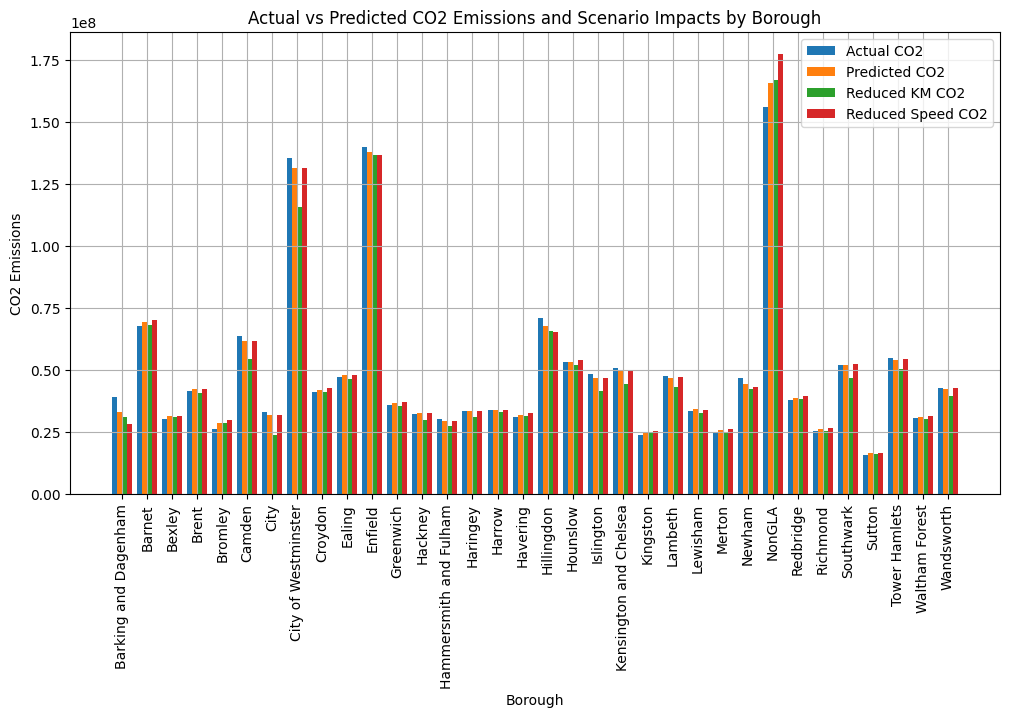

In [18]:
# Plotting the actual vs predicted CO2 emissions by borough
plt.figure(figsize=(12, 6))
bar_width = 0.2
index = np.arange(len(results_by_borough))

plt.bar(index, results_by_borough['Actual CO2'], bar_width, label='Actual CO2')
plt.bar(index + bar_width, results_by_borough['Predicted CO2'], bar_width, label='Predicted CO2')
plt.bar(index + 2 * bar_width, results_by_borough['Reduced KM CO2'], bar_width, label='Reduced KM CO2')
plt.bar(index + 3 * bar_width, results_by_borough['Reduced Speed CO2'], bar_width, label='Reduced Speed CO2')

plt.xlabel('Borough')
plt.ylabel('CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions and Scenario Impacts by Borough')
plt.xticks(index + 1.5 * bar_width, results_by_borough['Borough'], rotation=90)
plt.legend()
plt.grid(True)
plt.show()

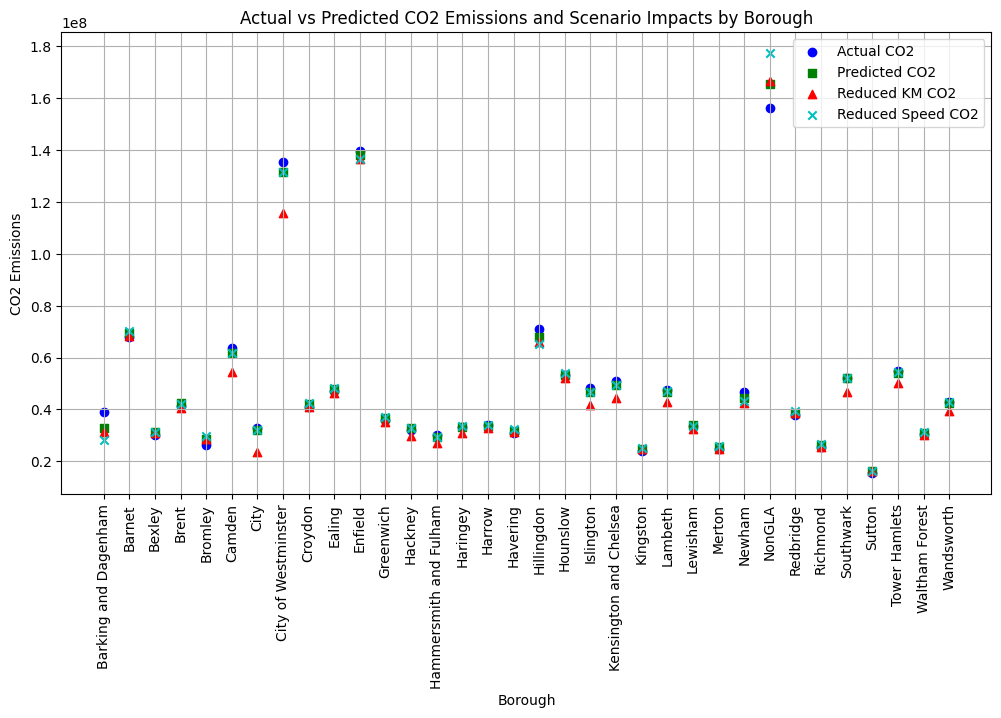

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the actual vs predicted CO2 emissions by borough as scatter plot
plt.figure(figsize=(12, 6))

# Scatter plot for each category
plt.scatter(results_by_borough['Borough'], results_by_borough['Actual CO2'], color='b', label='Actual CO2', marker='o')
plt.scatter(results_by_borough['Borough'], results_by_borough['Predicted CO2'], color='g', label='Predicted CO2', marker='s')
plt.scatter(results_by_borough['Borough'], results_by_borough['Reduced KM CO2'], color='r', label='Reduced KM CO2', marker='^')
plt.scatter(results_by_borough['Borough'], results_by_borough['Reduced Speed CO2'], color='c', label='Reduced Speed CO2', marker='x')

# Labels and title
plt.xlabel('Borough')
plt.ylabel('CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions and Scenario Impacts by Borough')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [ ]:
# Plotting the impact of scenario changes by borough
plt.figure(figsize=(12, 6))

# Calculate the mean impact for each scenario
mean_impact_reduced_km = results_by_borough['Predicted CO2'] - results_by_borough['Reduced KM CO2']
mean_impact_reduced_speed = results_by_borough['Predicted CO2'] - results_by_borough['Reduced Speed CO2']

plt.bar(['Reduced Kilometers by 20%', 'Reduced Speed to 30 km/h'], 
        [mean_impact_reduced_km.mean(), mean_impact_reduced_speed.mean()],
        color=['blue', 'red'])

plt.ylabel('Mean Reduction in CO2 Emissions')
plt.title('Impact of Scenario Changes on CO2 Emissions by Borough')
plt.grid(True)
plt.show()